# Library

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn import metrics

# Import Data

In [69]:
df = pd.read_csv('GRAPE_QUALITY.csv', sep=',')
df

sample_id             variety          region  quality_score  \
0            1            Riesling  Barossa Valley           2.11   
1            2          Pinot Noir    Loire Valley           2.83   
2            3     Sauvignon Blanc     Napa Valley           3.52   
3            4            Riesling     Napa Valley           2.28   
4            5              Merlot     Napa Valley           2.90   
..         ...                 ...             ...            ...   
995        996     Sauvignon Blanc     Napa Valley           3.14   
996        997  Cabernet Sauvignon          Sonoma           2.65   
997        998          Pinot Noir     Napa Valley           2.11   
998        999           Zinfandel    Loire Valley           2.28   
999       1000              Merlot     Napa Valley           1.96   

    quality_category  sugar_content_brix  acidity_ph  cluster_weight_g  \
0             Medium               13.70        3.17            251.81   
1               High               20.84        3.15            289.00   
2            Premium               27.46        4.07            125.14   
3             Medium               24.64        3.15            237.46   
4               High               26.13        3.18            221.52   
..               ...                 ...         ...               ...   
995             High               23.14        4.01            182.63   
996             High               29.13        3.02            150.32   
997           Medium               11.38        3.23            168.37   
998           Medium               11.14        3.21            208.98   
999           Medium               15.64        4.02             98.41   

     berry_size_mm harvest_date  sun_exposure_hours  soil_moisture_percent  \
0            18.58   2023-09-04                 8.4                   55.9   
1            22.08   2023-09-16                 8.8                   36.9   
2            21.40   2023-08-25                11.1                   64.9   
3            12.31   2023-09-13                 8.0                   54.5   
4            12.24   2023-08-11                11.2                   36.3   
..             ...          ...                 ...                    ...   
995          23.46   2023-09-09                10.1                   53.2   
996          11.79   2023-08-19                 9.0                   56.7   
997          14.92   2023-08-28                10.6                   66.5   
998          22.24   2023-08-24                 8.9                   43.8   
999          18.96   2023-08-29                 6.9                   54.9   

     rainfall_mm  
0          223.3  
1          312.1  
2          698.7  
3          660.1  
4          410.4  
..           ...  
995        363.9  
996        325.7  
997        473.2  
998        745.1  
999        262.7  

[1000 rows x 13 columns]

# Data Processing

In [70]:
df.columns

Index(['sample_id', 'variety', 'region', 'quality_score', 'quality_category',
       'sugar_content_brix', 'acidity_ph', 'cluster_weight_g', 'berry_size_mm',
       'harvest_date', 'sun_exposure_hours', 'soil_moisture_percent',
       'rainfall_mm'],
      dtype='object')

In [71]:
df = df.drop(columns='sample_id')

In [72]:
df['harvest_date'] = pd.to_datetime(df['harvest_date'])

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   variety                1000 non-null   object        
 1   region                 1000 non-null   object        
 2   quality_score          1000 non-null   float64       
 3   quality_category       1000 non-null   object        
 4   sugar_content_brix     1000 non-null   float64       
 5   acidity_ph             1000 non-null   float64       
 6   cluster_weight_g       1000 non-null   float64       
 7   berry_size_mm          1000 non-null   float64       
 8   harvest_date           1000 non-null   datetime64[ns]
 9   sun_exposure_hours     1000 non-null   float64       
 10  soil_moisture_percent  1000 non-null   float64       
 11  rainfall_mm            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(8), object(3)
memory usage: 93.9+

In [74]:
df.isna().sum()

variety                  0
region                   0
quality_score            0
quality_category         0
sugar_content_brix       0
acidity_ph               0
cluster_weight_g         0
berry_size_mm            0
harvest_date             0
sun_exposure_hours       0
soil_moisture_percent    0
rainfall_mm              0
dtype: int64

# Exploratory Data Analysis

In [75]:
df_copy = df.copy()

In [76]:
categorical_col = list(df_copy.select_dtypes(include=["object", "category"]).columns)
numerical_col = list(df_copy.select_dtypes(include=["int64", "float64"]).columns)

print(categorical_col, '\n', numerical_col)

['variety', 'region', 'quality_category'] 
 ['quality_score', 'sugar_content_brix', 'acidity_ph', 'cluster_weight_g', 'berry_size_mm', 'sun_exposure_hours', 'soil_moisture_percent', 'rainfall_mm']


## Data Distribution and Box Plot

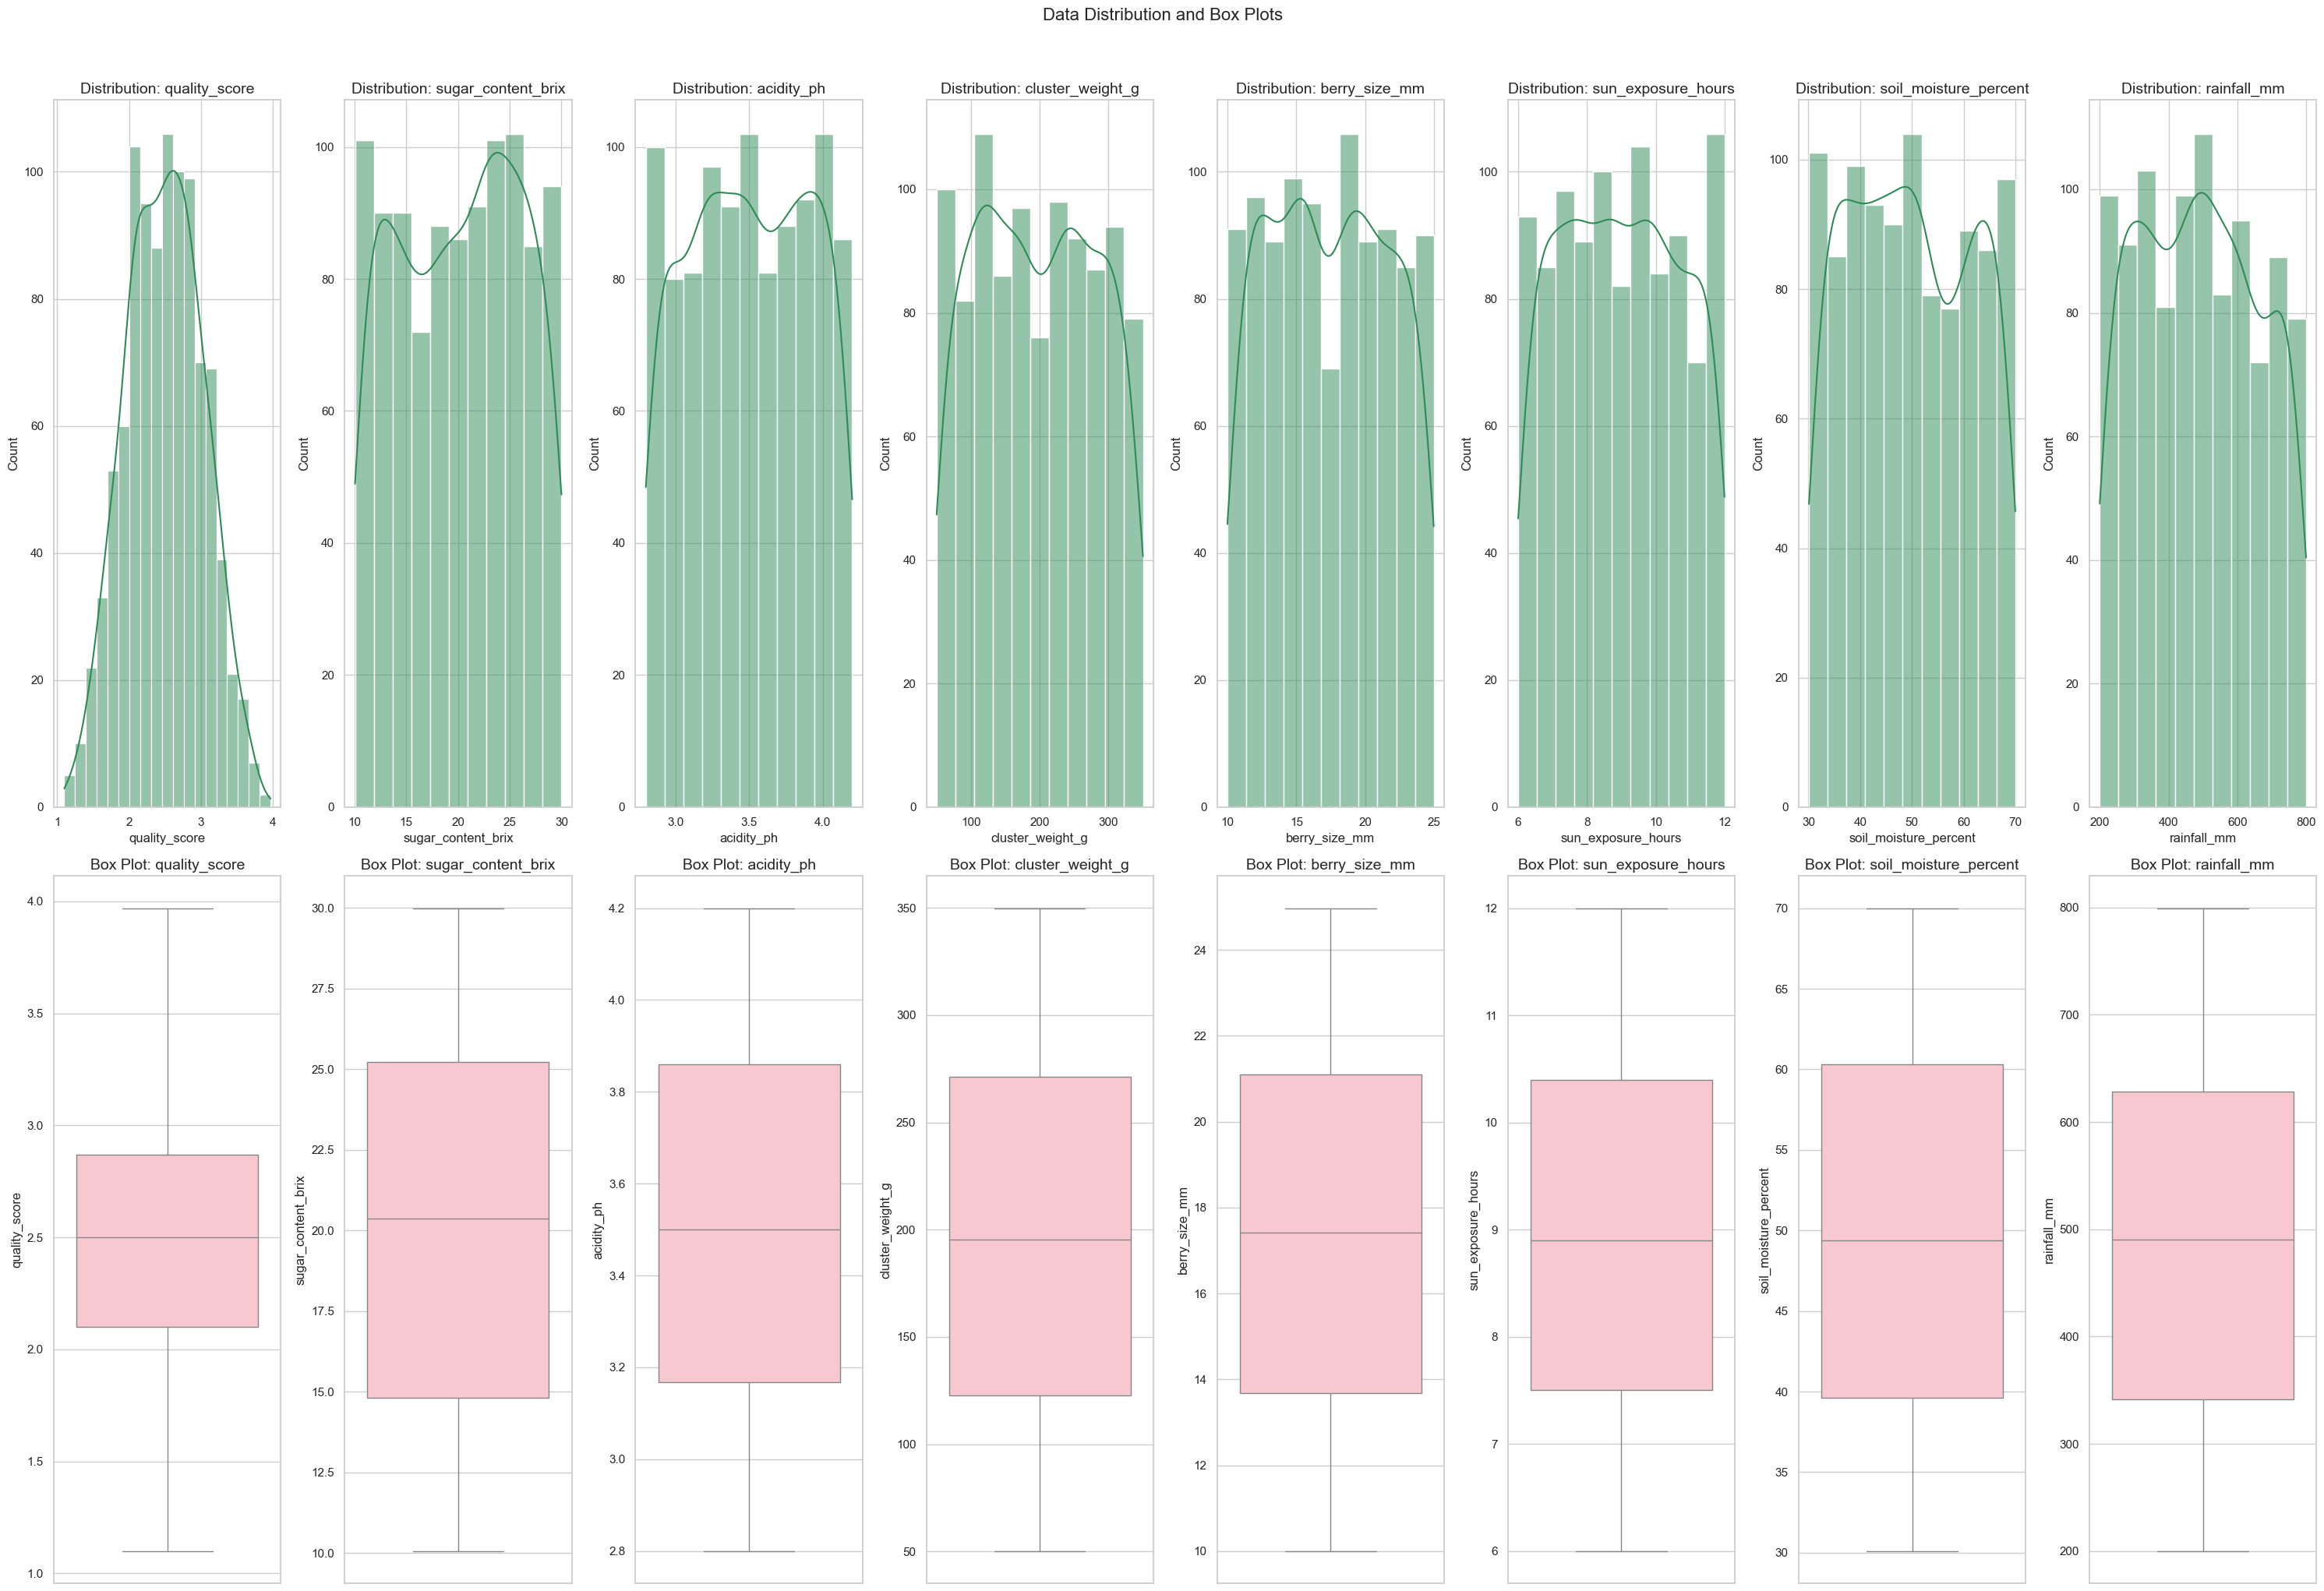

In [77]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=len(numerical_col), figsize=(30, 20))
fig.suptitle("Data Distribution and Box Plots", fontsize=16, y=1.02)

for i, col in enumerate(numerical_col):
    # Distribution Plot
    sns.histplot(df_copy[col], kde=True, ax=axes[0, i], color="seagreen")
    axes[0, i].set_title(f"Distribution: {col}", fontsize=14)
    
    # Box Plot
    sns.boxplot(y=df_copy[col], ax=axes[1, i], color="pink")
    axes[1, i].set_title(f"Box Plot: {col}", fontsize=14)

plt.tight_layout()
plt.show()

## Pairplot 

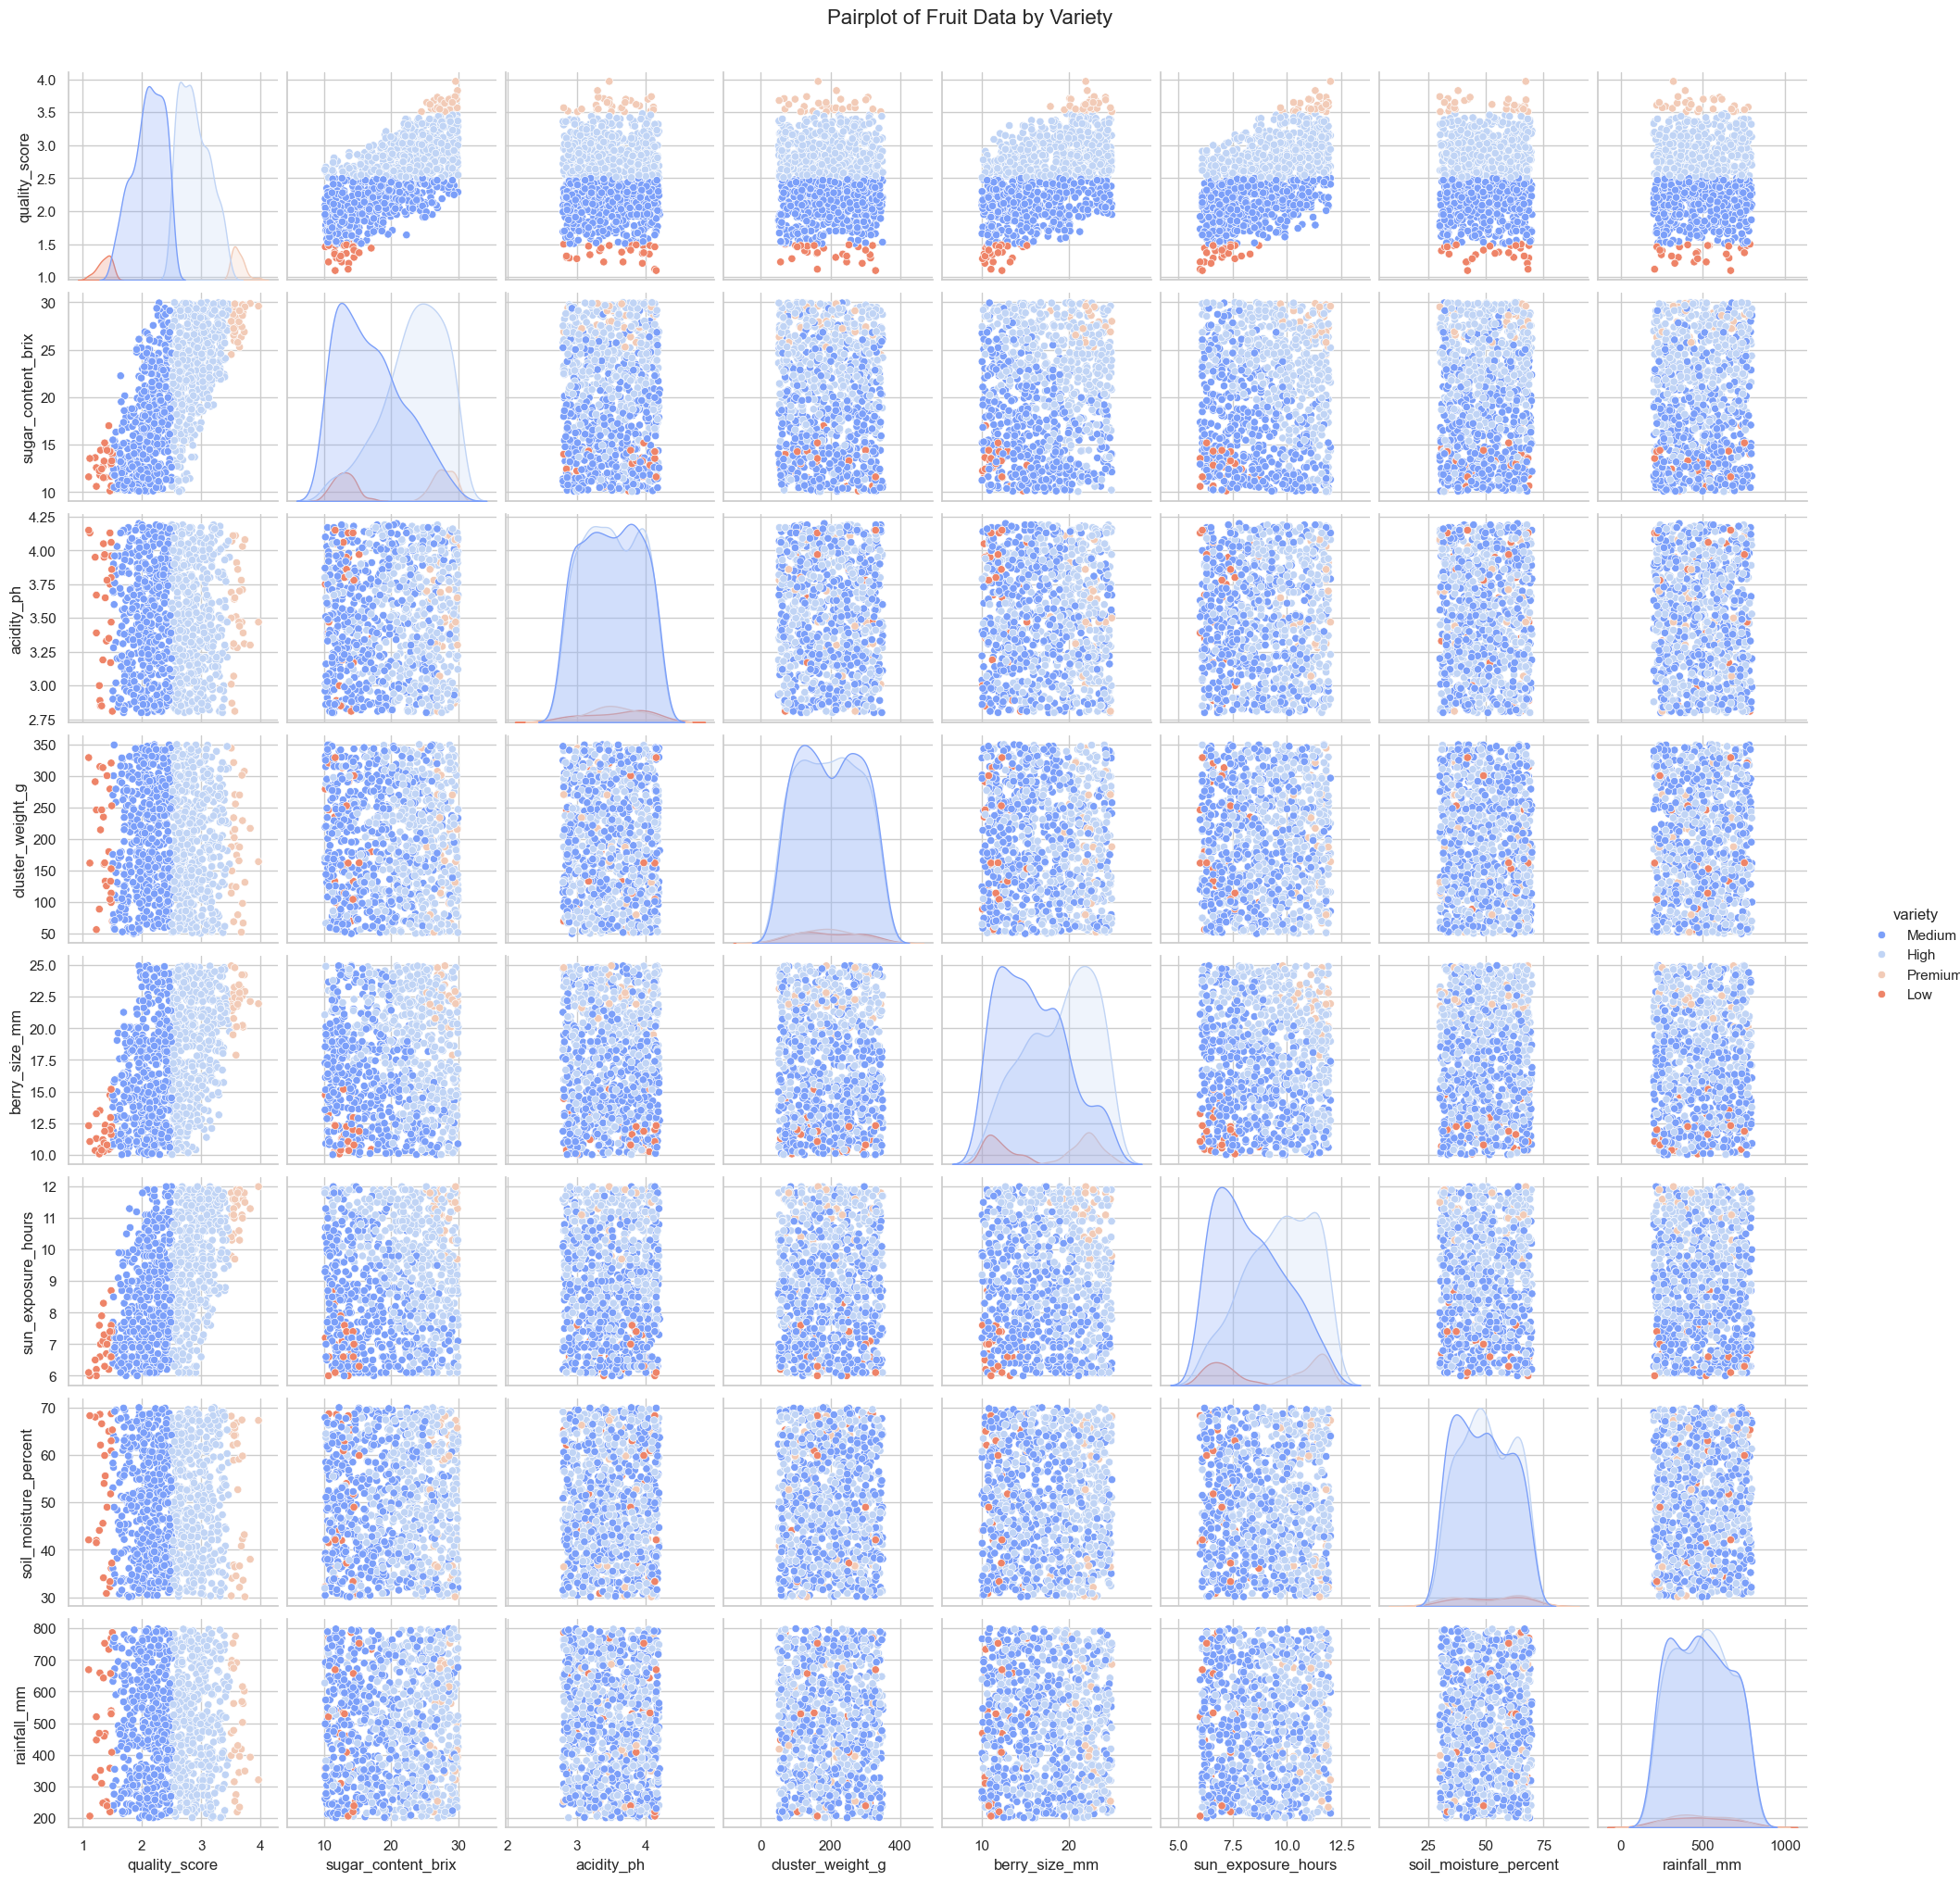

In [78]:
sns.set_theme(style="whitegrid", palette="pastel")

pairplot = sns.pairplot(df_copy, hue='quality_category', palette="coolwarm", diag_kind="kde", height=2.5)
pairplot.fig.suptitle("Pairplot of Fruit Data by Variety", y=1.02, fontsize=16)
pairplot._legend.set_title("variety")
pairplot._legend.set_bbox_to_anchor((1, 0.5))  

# Data Splitting

In [79]:
X = df.drop(columns='quality_score')
y = df['quality_score']

In [80]:
X

variety          region quality_category  sugar_content_brix  \
0              Riesling  Barossa Valley           Medium               13.70   
1            Pinot Noir    Loire Valley             High               20.84   
2       Sauvignon Blanc     Napa Valley          Premium               27.46   
3              Riesling     Napa Valley           Medium               24.64   
4                Merlot     Napa Valley             High               26.13   
..                  ...             ...              ...                 ...   
995     Sauvignon Blanc     Napa Valley             High               23.14   
996  Cabernet Sauvignon          Sonoma             High               29.13   
997          Pinot Noir     Napa Valley           Medium               11.38   
998           Zinfandel    Loire Valley           Medium               11.14   
999              Merlot     Napa Valley           Medium               15.64   

     acidity_ph  cluster_weight_g  berry_size_mm harvest_date  \
0          3.17            251.81          18.58   2023-09-04   
1          3.15            289.00          22.08   2023-09-16   
2          4.07            125.14          21.40   2023-08-25   
3          3.15            237.46          12.31   2023-09-13   
4          3.18            221.52          12.24   2023-08-11   
..          ...               ...            ...          ...   
995        4.01            182.63          23.46   2023-09-09   
996        3.02            150.32          11.79   2023-08-19   
997        3.23            168.37          14.92   2023-08-28   
998        3.21            208.98          22.24   2023-08-24   
999        4.02             98.41          18.96   2023-08-29   

     sun_exposure_hours  soil_moisture_percent  rainfall_mm  
0                   8.4                   55.9        223.3  
1                   8.8                   36.9        312.1  
2                  11.1                   64.9        698.7  
3                   8.0                   54.5        660.1  
4                  11.2                   36.3        410.4  
..                  ...                    ...          ...  
995                10.1                   53.2        363.9  
996                 9.0                   56.7        325.7  
997                10.6                   66.5        473.2  
998                 8.9                   43.8        745.1  
999                 6.9                   54.9        262.7  

[1000 rows x 11 columns]

In [81]:
y

0      2.11
1      2.83
2      3.52
3      2.28
4      2.90
       ... 
995    3.14
996    2.65
997    2.11
998    2.28
999    1.96
Name: quality_score, Length: 1000, dtype: float64

# Feature Engineering

In [82]:
numerical_col.remove('quality_score')

In [83]:
X['harvest_date'] = X['harvest_date'].astype('int64')

In [84]:
lb = LabelEncoder()

for col in categorical_col:
    X[col]= lb.fit_transform(X[col])

In [85]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

y = np.array(y).reshape(-1, 1)
y = scaler.fit_transform(y)

# Train-Test Split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [87]:
model = SVR(kernel='linear')

In [88]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(model, X, y.ravel(), cv = 5, scoring='r2')
print(score.mean())

0.9338980530285301


In [89]:
model.fit(X_train, y_train.ravel())

SVR(kernel='linear')

# Prediction

In [90]:
y_pred = model.predict(X_test)

# Model Evaluation

In [91]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = metrics.r2_score(y_test, y_pred)
explained_variance = metrics.explained_variance_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)
print("Explained Variance Score:", explained_variance)

Mean Absolute Error (MAE): 0.04254740270542976
Mean Squared Error (MSE): 0.0023684376352169113
Root Mean Squared Error (RMSE): 0.04866659670879926
R-squared (R²): 0.9349857847480254
Explained Variance Score: 0.9356043839919327


# Metric Graph

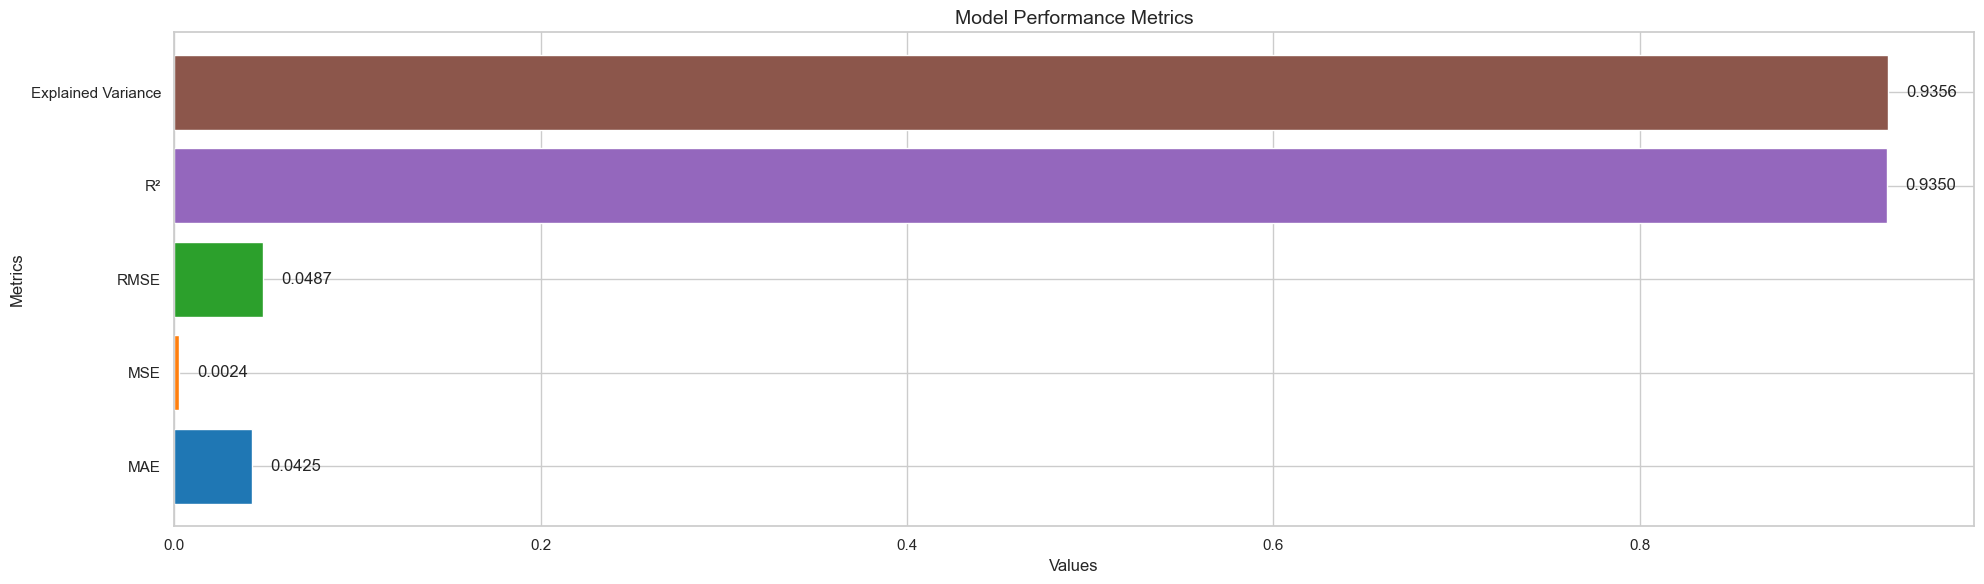

In [92]:
# Create a list of metric names and their corresponding values
metrics_names = ['MAE', 'MSE', 'RMSE', 'R²', 'Explained Variance']
metrics_values = [mae, mse, rmse, r2, explained_variance]

# Create a horizontal bar plot for the metrics
plt.figure(figsize=(20, 6))
plt.barh(metrics_names, metrics_values, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd', '#8c564b'])

# Add titles and labels
plt.title('Model Performance Metrics', fontsize=14)
plt.xlabel('Values', fontsize=12)
plt.ylabel('Metrics', fontsize=12)

# Display the values on the bars
for i, v in enumerate(metrics_values):
    plt.text(v + 0.01, i, f'{v:.4f}', va='center', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()